I-Regression algorithm implementation 

This homework problem will illustrate the use of loss functions and gradient descent to implement linear regression. 

1. Implement a linear regression algorithm using your implementation of gradient descent for the following objective/loss functions: 

a. Mean absolute error $$ l_1 : E_1(f) = \Sigma_{k=1}^n |f(x_k) - y_k| $$

In [20]:
#import sympy as sym
def gradDescent_1(x, y, m, b, delta = 0.001, epochs = 1000):
    # Inititalize error array
    err = np.zeros(epochs)
    for i in range(epochs):
        #Define the model: f(x) = mx - b    
        y_pred = m*x - b
        # Partial derivative of the Loss function w.r.t m
        dfdm = sum(x*(y_pred - y)/ abs(y_pred - y))
        # Partial derivative of the Loss function w.r.t b
        dfdb = sum((- y_pred + y)/ abs(y_pred - y))
        m = m - delta * dfdm # Update m
        b = b - delta * dfdb # Update b
        err[i] = sum(abs(y_pred - y)) # Calculate the error
    return m, b, err # Return calculated coefficients and error (array)

b. Least squared error $$ l_2 : E_2(f) = \Sigma_{k=1}^n (|f(x_k) - y_k|)^{1/2} $$

In [21]:

def gradDescent_2(x, y, m, b, delta = 0.001, epochs = 1000):
    # Inititalize error array
    err = np.zeros(epochs)
    for i in range(epochs):
        #Define the model: f(x) = mx - b  
        y_pred = m*x - b
        # Partial derivative of the Loss function w.r.t m
        dfdm = (1/2)*sum(abs(y_pred - y))**(-1/2) * sum(x*(y_pred - y)/abs(y_pred - y))
        # Partial derivative of the Loss function w.r.t b
        dfdb = (1/2)*sum(abs(y_pred - y))**(-1/2) * sum((-y_pred + y)/abs(y_pred - y))
        m = m - delta * dfdm # Update m
        b = b - delta * dfdb # Update b
        err[i] = sum(abs(y_pred - y))**(1/2) # Calculate the error
    return m, b, err # Return calculated coefficients and error (array)

2. Test your algorithm on the dataset almost_linear.csv Download almost_linear.csv(fit one set of data either TV vs sales or Radio vs sales) using at most three different learning rates. Plot 
 errors as a function of number of iterations of your algorithm. State values for m, b and total error for each objective/loss function and learning rate combination.  

========================================Mean Absolute Error=========================================
m = 12.286399999999905, b = 30.547999999999963, delta = 0.002, Error = 6575.915759999994
m = 11.796999999999981, b = 20.552000000000007, delta = 0.001, Error = 6677.01696
m = 10.889239999999596, b = 7.735000000000195, delta = 0.0001, Error = 6863.413855999995

========================================Least Squared Error=========================================
m = 10.75115763094442, b = 6.171220375534616, delta = 0.002, Error 83.01459431920875
m = 10.74680604187098, b = 6.0631741891505815, delta = 0.001, Error 83.02627454289724
m = 10.223335995677468, b = 5.99696084266799, delta = 0.0001, Error 83.80541453905398


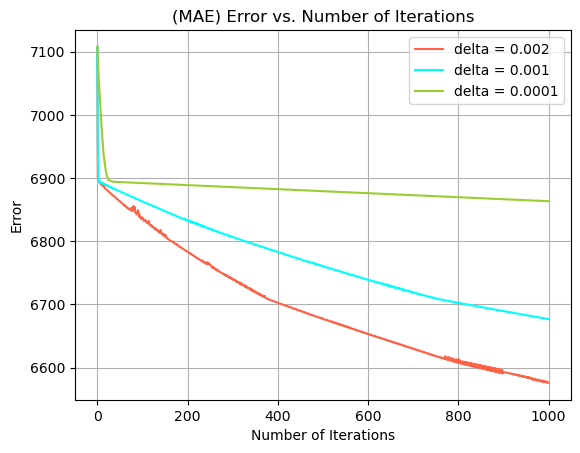

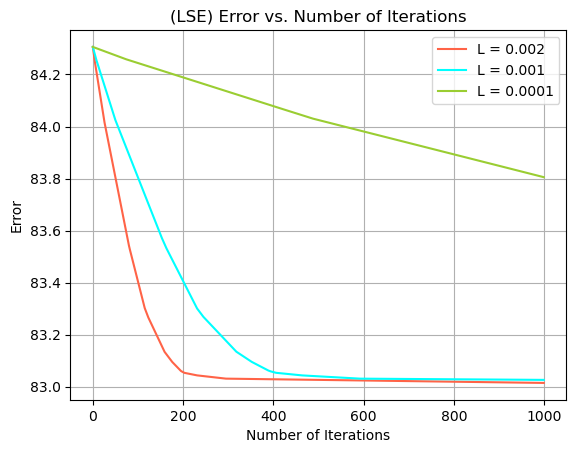

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv('almost_linear.csv')
#Isolate data
sales_X = df.loc[:,'sales'].values.reshape(-1,1)
TV_Y = df.loc[:, 'TV'].values.reshape(-1,1)
# Split the data into training/testing sets
sales_X_train, sales_X_test, TV_Y_train, TV_Y_test = train_test_split(sales_X, TV_Y, test_size = 0.2)
# Initial guesses for coefficients
m0, b0 = 10, 6
# Learning step sizes
delta = [0.002, 0.001, 0.0001]
# Plot data (mean absolute error)
plt.figure()
colors = ['tomato', 'cyan', 'yellowgreen']
print('=' * 40 + 'Mean Absolute Error' + '=' * 41)
for i in range(len(delta)):
    # Train Gradient Descent
    m_1, b_1, MAE = gradDescent_1(sales_X_train, TV_Y_train, m0, b0, delta[i])
    plt.plot(MAE, color = colors[i], label = f'delta = {delta[i]}')
    
    # Print data
    print(f'm = {m_1[0]}, b = {b_1[0]}, delta = {delta[i]}, Error = {MAE[-1]}')
    print('=' * 100)
#Plot config
plt.title('(MAE) Error vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid()
plt.legend()
#Plot data (Least squared error)
plt.figure()
print('\n' + '=' * 40 + 'Least Squared Error' + '=' * 41)
for i in range(len(delta)):
    #Train gradient descent
    m_2, b_2, LSE = gradDescent_2(sales_X_train, TV_Y_train, m0, b0, delta[i])
    plt.plot(LSE, color = colors[i], label = f'L = {delta[i]}')
    #Print data
    print(f'm = {m_2[0]}, b = {b_2[0]}, delta = {delta[i]}, Error {LSE[-1]}')
    print('=' * 100)
#plot config 
plt.title('(LSE) Error vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

3. Compare your results with a standard linear regression solver like sklearn.linear_model.LinearRegression

(SKL, delta = 0.002)Fit error (RMSE): 56.01 
(MAE, delta = 0.002)Fit error (RMSE): 56.21 

(SKL, delta = 0.001)Fit error (RMSE): 56.01 
(MAE, delta = 0.001)Fit error (RMSE): 56.29 

(SKL, delta = 0.0001)Fit error (RMSE): 56.01 
(MAE, delta = 0.0001)Fit error (RMSE): 56.95 



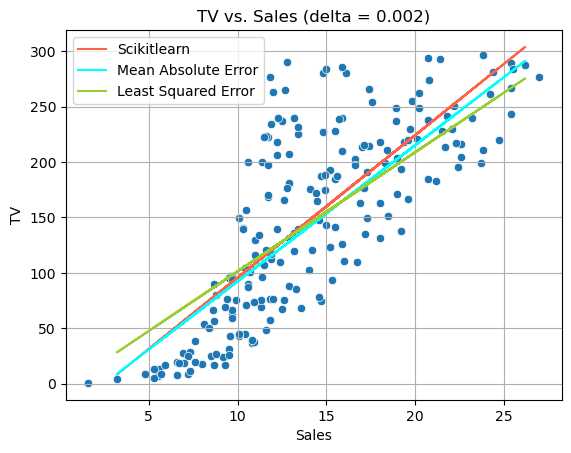

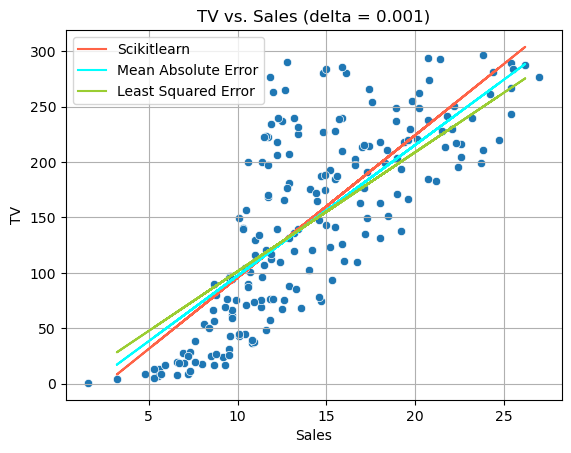

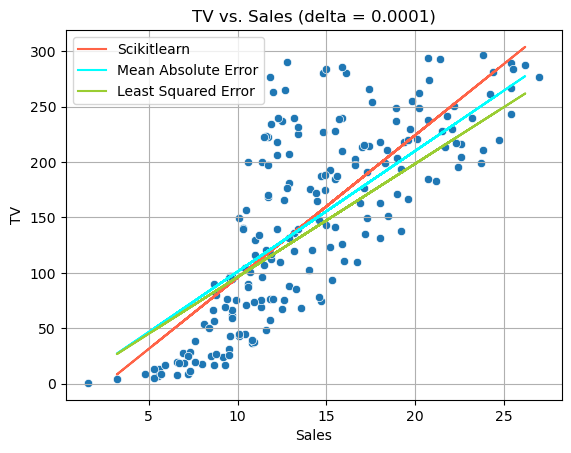

In [29]:
### Question 3
# Import packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

#Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the training sets
regr.fit(sales_X_train, TV_Y_train)
#Make prediction using the testing test
TV_Y_pred = regr.predict(sales_X_test)
for i in range(len(delta)):
    #Train Gradient Descent
    m_1, b_1, _ = gradDescent_1(sales_X_train, TV_Y_train, m0, b0, delta[i])
    m_2, b_2, _ = gradDescent_2(sales_X_train, TV_Y_train, m0, b0, delta[i])
    #Print RMSE
    print('=' * 100)
    print(f"(SKL, delta = {delta[i]})" + "Fit error (RMSE): %.2f " % np.sqrt(mean_squared_error(TV_Y_test, TV_Y_pred))) #Scikitlearn
    print(f"(MAE, delta = {delta[i]})" + "Fit error (RMSE): %.2f " % np.sqrt(mean_squared_error(TV_Y_test, m_1[0]*sales_X_test - b_1[0])))
    print('=' * 100 + '\n')
    # Plot data
    plt.figure()
    sns.scatterplot(data = df, x = 'sales', y = 'TV').set(title = f'TV vs. Sales (delta = {delta[i]})',
                                                         xlabel = 'Sales',
                                                         ylabel = 'TV')
    plt.plot(sales_X_test, TV_Y_pred, color = 'tomato', label = 'Scikitlearn')
    plt.plot(sales_X_test, m_1[0]*sales_X_test - b_1[0], color = 'cyan', label = 'Mean Absolute Error')
    plt.plot(sales_X_test, m_2[0]*sales_X_test - b_2[0], color = 'yellowgreen', label = 'Least Squared Error')
    # Plot config
    plt.grid()
    plt.legend()
plt.show()